In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

# 0. Dataset

In [2]:
if True:
    addr_path = "assets/addr.csv"
    df = pd.read_csv(
        addr_path,
        header=None,
        names=["address", "block_number", "ether", "has_source"]
    )
    print(df.shape)
    print(df["block_number"].min())
    print(df["block_number"].max())

(100000, 4)
9580268
9927613


# 0.1 Merge csv file

In [3]:
if False:
    files = os.listdir("results/")
    evm_files = list(filter(lambda x: x.startswith("sym_evm"), files))
    exception_files = list(filter(lambda x: x.startswith("exception"), files))
    ##
    evm_dfs = []
    for f in evm_files:
        df = pd.read_csv("results/" + f)
        evm_dfs.append(df)
    evm_df = pd.concat(evm_dfs)
    print(evm_df.shape)
    evm_df.to_csv("results/sym_evm.csv", index=False)
    ##
    exception_dfs = []
    for f in exception_files:
        df = pd.read_csv("results/" + f)
        exception_dfs.append(df)
    exception_df = pd.concat(exception_dfs)
    print(exception_df.shape)
    exception_df.to_csv("results/exception.csv", index=False)
    

# 0.2 Summary

In [86]:
if True:
    total = 1056
    dfs = [
        pd.read_csv("results/sym_evm.csv"),
        pd.read_csv("results/exception.csv"),
    ]
    [df_evm, df_exception] = dfs
    no_entry = total - df_evm.shape[0] - df_exception.shape[0]
    ok = df_evm.shape[0]
    failed = df_exception.shape[0]
    print("No entry: {} - {}".format(no_entry, round(no_entry/total * 100)))
    print("OK: {} - {}".format(ok, round(ok/total * 100)))
    print("Failed: {} - {}".format(failed, round(failed/total * 100)))
    print("Heap: " + str(df_exception["heap"].sum()))
    print("Timeout: " + str(df_exception["timeout"].sum()))
    print("AST: " + str(df_exception["others"].sum()))
    df_evm["coverage"] = round((df_evm["covered_jumpis"] + 1) / (df_evm["total_jumpis"] + 1) * 100)
    df = df_evm[df_evm["coverage"] >= 95]
    print("under_95: " + str(df_evm.shape[0] - df.shape[0]))
    print("over_95 : " + str(df.shape[0]))
    

No entry: 123 - 12
OK: 500 - 47
Failed: 433 - 41
Heap: 2
Timeout: 392
AST: 39
under_95: 15
over_95 : 485


# Duration

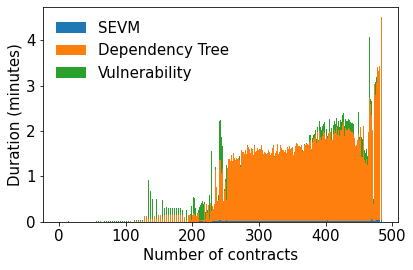

In [99]:
if True:
    sym_evm_path = "results/sym_evm.csv"
    df = pd.read_csv(sym_evm_path)
    df["coverage"] = round((df["covered_jumpis"] + 1) / (df["total_jumpis"] + 1) * 100)
    df = df[df["coverage"] >= 95]
    ###
    df = df.sort_values(by="endpoints")
    fig = plt.figure()
    xs = range(0, df.shape[0])
    concolic = df["concolic_duration"].values / 60000
    tainting = df["tainting_duration"].values / 60000
    scan = df["scanner_duration"].values / 60000
    plt.bar(xs, concolic, label = "SEVM")
    plt.bar(xs, tainting, bottom = concolic, label = "Dependency Tree")
    plt.bar(xs, scan, bottom = concolic + tainting, label = "Vulnerability")
    plt.xlabel("Number of contracts")
    plt.ylabel("Duration (minutes)")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.plot()
    fig.savefig('duration.eps', format='eps')

# 1. Draw execution paths

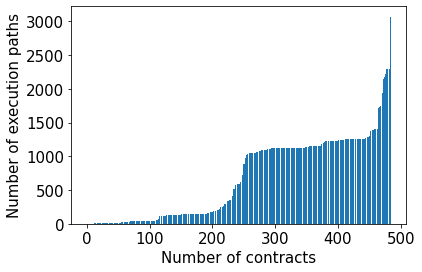

In [101]:
if True:
    sym_evm_path = "results/sym_evm.csv"
    df = pd.read_csv(sym_evm_path)
    df["coverage"] = round((df["covered_jumpis"] + 1) / (df["total_jumpis"] + 1) * 100)
    df = df[df["coverage"] >= 95]
    ###
    df = df.sort_values(by="endpoints")
    fig = plt.figure()
    plt.bar(xs, df["endpoints"].values, label="execution paths")
    plt.xlabel("Number of contracts")
    plt.ylabel("Number of execution paths") 
    fig.savefig('complexity.eps', format='eps')
    ## more info
#     print(df["endpoints"].mean())

# 4.1. Draw tainting for each type

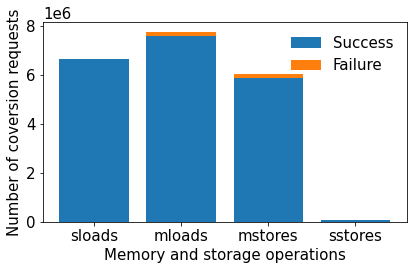

In [107]:
if True:
    sym_evm_path = "results/sym_evm.csv"
    df = pd.read_csv(sym_evm_path)
    df["coverage"] = round((df["covered_jumpis"] + 1) / (df["total_jumpis"] + 1) * 100)
    df = df[df["coverage"] >= 95]
    xs = np.array([
        "sloads",
        "mloads",
        "mstores",
        "sstores",
    ])
    fig = plt.figure()
    success_sloads = df["success_sloads"].sum()
    success_mloads = df["success_mloads"].sum()
    success_mstores = df["success_mstores"].sum()
    success_sstores = df["success_sstores"].sum()
    success = np.array([success_sloads, success_mloads, success_mstores, success_sstores])
    plt.bar(xs, success, label="Success")
    
    failed_sloads = df["failed_sloads"].sum()
    failed_mloads = df["failed_mloads"].sum()
    failed_mstores = df["failed_mstores"].sum()
    failed_sstores = df["failed_sstores"].sum()
    
    failure = np.array([failed_sloads, failed_mloads, failed_mstores, failed_sstores])
    plt.bar(xs, failure, bottom=success, label="Failure")
    plt.ylabel("Number of coversion requests")
    plt.xlabel("Memory and storage operations")
    plt.legend(frameon=False, loc="upper right")
    plt.tight_layout()
    plt.show()
    fig.savefig('taint_analysis.eps', format='eps')
    ### info
#     print(success_sloads / (success_sloads + failed_sloads) * 100))
#     print(success_mloads / (success_mloads + failed_mloads) * 100))
#     print(success_mstores / (success_mstores + failed_mstores) * 100))
#     print(success_sstores / (success_sstores + failed_sstores) * 100))

# 5. Bugs

In [23]:
if True:
    sym_evm_path = "results/sym_evm.csv"
    df = pd.read_csv(sym_evm_path)
    df["coverage"] = round((df["covered_jumpis"] + 1) / (df["total_jumpis"] + 1) * 100)
    df = df[df["coverage"] >= 95]
    ##
    dd = df[
        (df["reentrancy"] >= 1) 
#         | (df["delegate"] >= 1)
#         | (df["number"] >= 1)
#         | (df["timestamp"] >= 1)
        |(df["disorder"] >= 1)
        |(df["frez"] >= 1)
    ]
    dd["links"] = "https://etherscan.io/address/" + df["address"]
    dd = dd[["links", "address", "reentrancy", "disorder", "frez"]]
    dd.to_csv("manual_check.csv")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## Manually investigate

- 0x8413746b162795eff7d3c8a90e32b8921413b802 | => Ok
- 0x66fd89c9917abbc157a2131096eb6fbd95bf6da7 | => problem with fixing id
- 0x8b3e6e910dfd6b406f9f15962b3656e799f60d2b | => AST problem 
- 0x7a78e3d47c9e20836aca681956d8a972c0c79389 | => AST problem
- 0x36d9d5d74940e1c659c8a92eaf654c2caede77ba | => AST problem
- 0x5258e3c9783908907cd44cd1911fc1492e81cea2 | => AST problem
- 0x5b63759a10f12c054039cdd5e302e65701d5b483 | => OK
- 0x1c097eaf035d39952fb5465d124c7ce39b3414f3 | => Fail to to view abstract function
- 0xde5e0502d6835ef60312be880538c2145971d098 | => srcmap is inaccrurate
- 

In [ ]:
version > 0.5.4